# The Tips Data Set

### Fundamentals of Data Analysis Assessment

***
## 1. Introduction
This notebook begins with a description of the tips data set obtained using summary statistics. There follows a section on regression to investigate if there is a relationship between the total bill and the tip amount. Finally, any interesting relationships between variables within the data set are teased out and investigated further. Findings from each part of the analysis are summarized in the README file.

### Preliminaries
Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as lm

***
## 2. Description of the data set

Load the data set to a dataframe and take a quick look at it by printing the first and last five lines.

In [2]:
# Load the data set.
tips = sns.load_dataset("tips")

# Size?
shape = tips.shape
print("Data frame shape", shape, "r,c")

# Print the first/last five lines.
tips.head()

Data frame shape (244, 7) r,c


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The rows of the data set contain **244** observations of the total bill and tip left in a resaurant, along with information about party size, day of the week, time of day, gender of the tipper, and whether or not they are a smoker. Three columns contain numeric data with class labels *total_bill*, *tip*, and *size*. The remaining four columns contain categorical data (divided into discrete groups) with class labels *sex*, *smoker*, *day*, and *time*. 

In [4]:
# Check for NaNs etc
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

Looks like there are no funny values in the data set so we can proceed without dealing with NaN values and other cleaning.

In [5]:
# Look at some quick descriptive statistics of the numeric data.
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Although this is useful, when we think of tips we usually imagine a percentage of the bill. I would say that the most important information contained in the data set is the tip as a fraction of the total bill. For this I will assume that the total_bill is the bill before the tip has been added in. 

In [6]:
# Make an empty data frame to hold tip as fraction of total bill.
ftip = pd.DataFrame(columns=['ftip'])
ftip['ftip'] = tips['tip']/tips['total_bill']

# Attach it to tips dataframe I think so can use groupby etc, work with df from now on.
df = pd.concat([ftip, tips], axis=1)

df.head( )

,ftip,total_bill,tip,sex,smoker,day,time,size
0,0.059447,16.99,1.01,Female,No,Sun,Dinner,2
1,0.160542,10.34,1.66,Male,No,Sun,Dinner,3
2,0.166587,21.01,3.50,Male,No,Sun,Dinner,3
3,0.139780,23.68,3.31,Male,No,Sun,Dinner,2
4,0.146808,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Get descriptive statistics for all columns, not just the numeric ones.
df.describe(include="all")

,ftip,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,157,151,87,176,NaN
mean,0.160803,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,0.061072,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,0.035638,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,0.129127,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,0.154770,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,0.191475,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- It looks as if the average tip is about 16% of the total bill, although some very generous diner tipped 70% and a stingy one left only 3%.
- The 50th percentile, or median, fractional tip is very similar to the mean fractional tip. This implies that the mean value is a typical value in the data set. 
- There are two unique values of sex, which we know to be Male and Female. Of the 244 observations, 157 concern males.
- There are two unique values of smoker, which we know to be Yes or No. Of the 244 observations, 151 concern smokers.
- Four unique values of day, Saturday being the most frequent with 87 of the 244 observations.
- Two unique values of time, with most meals being dinner: 176 of the total.
- Party size varied from 1 to 6.

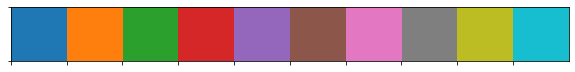

In [8]:
# Set up my plotting preferences.
current_palette = sns.color_palette()
sns.palplot(current_palette)
sns.set_style('whitegrid')

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = (14)

We now start plotting some columns of the data set.

Text(0.5, 0.98, 'tip vs total bill')

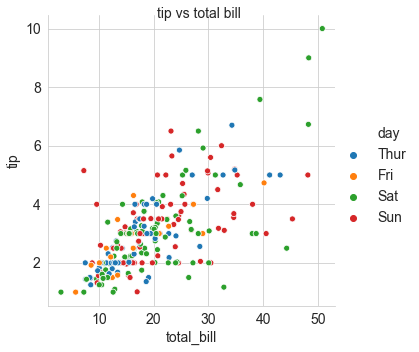

In [9]:
# How does tip vary with total_bill?
g = sns.relplot(x="total_bill", y="tip", hue='day', data=df) #size='time' makes the plot crowded.
g.fig.suptitle('tip vs total bill', fontsize=14)
# Save the plot if required.
#g.savefig("images/tipVSbill.png") # Comment out after figure saved.

In this plot each color refers to a different day while the size of the markers is used to differentiate between the dining times. It appears that the tip does increase as the total_bill goes up. We'll be looking at this in more detail in the section on regression. For now, we'll plot the tip as a fraction of the total bill. This should be roughly a constant with some spread reflecting the range of straight lines that could be drawn through the data in the plot above.

Text(0, 0.5, 'fractional tip')

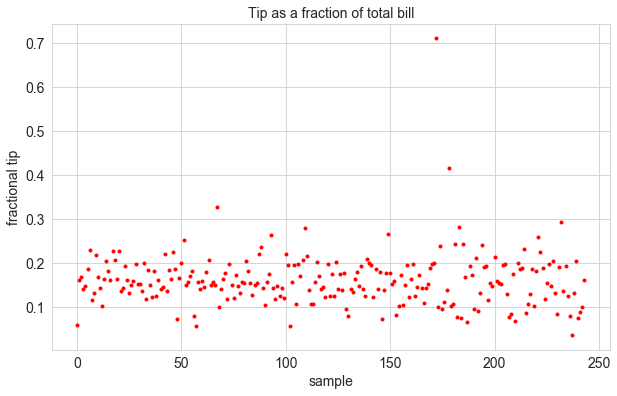

In [10]:
# Tip as a fraction of the total_bill.
plt.plot(df['ftip'], '.r')
plt.title('Tip as a fraction of total bill', fontsize='14')
plt.xlabel('sample', fontsize='14')
plt.ylabel('fractional tip', fontsize='14')

There seems to be one outlier - the 70% tip. It might be better to ignore it, we'll see later. For now just find it's location and who it refers to.

In [11]:
# Identify the outlier.
df.iloc[df.index[df['ftip'] > 0.5]]

,ftip,total_bill,tip,sex,smoker,day,time,size
172,0.710345,7.25,5.15,Male,Yes,Sun,Dinner,2


In [12]:
# What are the days and dining times contained in the data set?
print("Dining times are: ", df.time.unique())
print("Days are: ", df.day.unique())

Dining times are:  [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]
Days are:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


### Dig deeper into the data set.
I will now look at how some of the other variables affect tip size. Although Seaborn allows for some very complicated visualizations, I prefer not to put too much information on one plot at this stage.

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'ftip')]

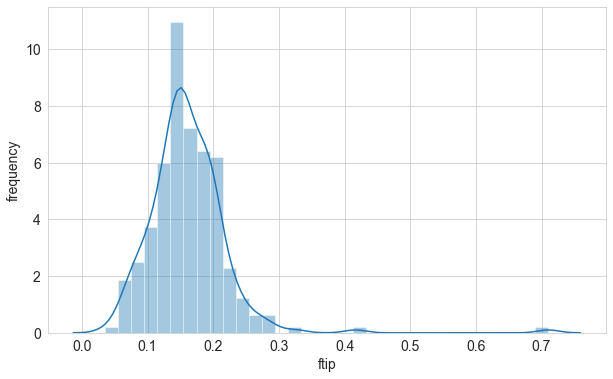

In [13]:
# Histogram of all fractional tips.
ax = sns.distplot(df['ftip'])
ax.set(xlabel= 'ftip', ylabel= 'frequency')

That outlier at 0.7 is going to mess up my plots if I leave it in place. I'm tempted to ignore it/replace it with something. I don't think it will affect calculations of mean etc too much though, it just doesn't look nice.

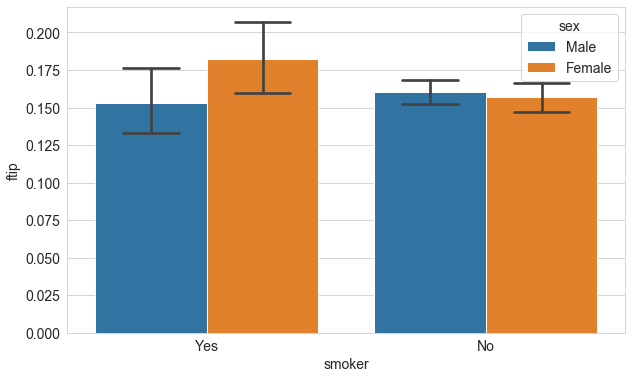

In [14]:
# Plot the fractional tip for smokers/non-smokers and male/female.
# Ignoring outlier doesn't have much effect.
sns.barplot(x= 'smoker', y= 'ftip', hue='sex', data = df, capsize=.2) #data = df[df.ftip < 0.6]
# Save the plot if required.
#plt.savefig("images/barSmokerSex.png")

This Seaborn barplot shows the mean fractional tip for male/female smokers/non-smokers. The error bars mark the 95% confidence interval: range within which there is a 95% chance of finding the mean. Looks like male and female non-smokers leave very similar fractional tips. However, female smokers leave larger tips on average, as a fraction of the total bill, than male smokers.

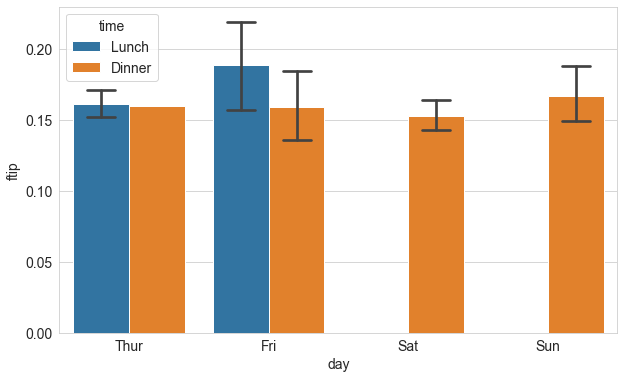

In [15]:
# How does the time affect the fractional tip?
sns.barplot(x="day", y="ftip", hue="time", data=df, capsize=.2) #data=df[df.ftip < 0.6] to ignore outlier
# Save the plot if required.
#plt.savefig("images/barDayTime.png")

From the above plot we see that while data from only dinner is recorded on Saturday and Sunday, both lunch and dinner are recorded on Fridays, and there seems to be only one observation relating to dinner on Thursday. On average, the largest fractional tips are left on Fridays at lunchtime - maybe happy end of week work lunches? We will look at how the variables are intertwined later on in the notebook.

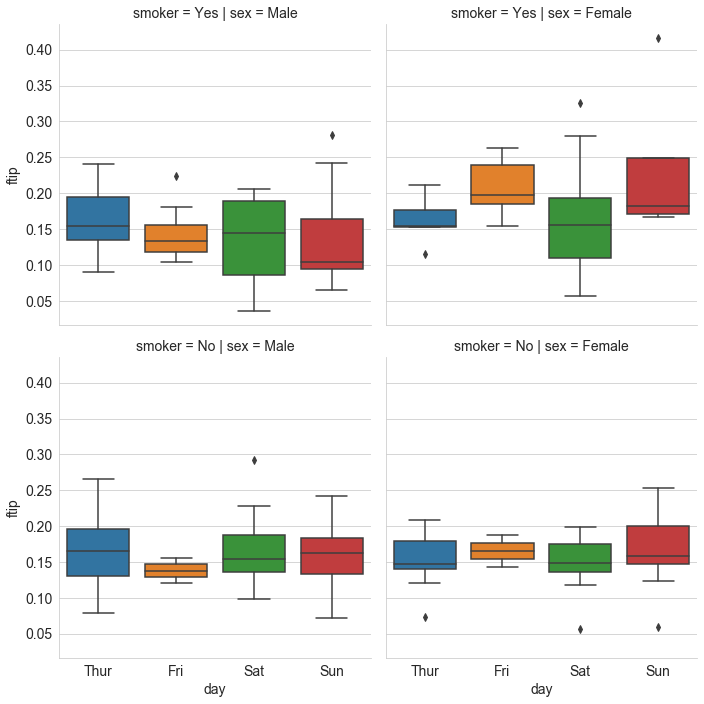

In [16]:
# Try to combine the categorical variables using catplot.
# Ignore outlier.
sns.catplot(x='day', y='ftip', row='smoker', col='sex', kind='box', data = df[df.ftip < 0.6])

This faceted box plot attempts to show the fractional tip as a function of day, with the data arranged by categorical variables smoker and sex. Note how all the y axis ranges are identical for ease of comparison. Each box shows the quartiles of the data set, the whiskers show the range, and outliers appear as points. Quartiles divide the data into quarters; the first quartile is the middle of the smallest number and the median, the second quartile is the median value, and the third quarter is the middle of the median and the largest number in the data set. This plot again confirms that non-smokers, regardless of whether they are male or female, leave similar tips (bottom two plots above). There's a bit more variation for tips left by males and females when they are smokers (top two plots).  

Confirm this difference in tipping behavior between male and female smokers by using Pandas **agg()** to look at mean values of numeric columns for those two categorical variables. Count the number of observations in each category at the same time; the total of each column should equal 244.

In [17]:
df.groupby(['smoker', 'sex']).agg(['count','mean'])

ftip           total_bill              tip            size  \
              count      mean      count       mean count      mean count   
smoker sex                                                                  
Yes    Male      60  0.152771         60  22.284500    60  3.051167    60   
       Female    33  0.182150         33  17.977879    33  2.931515    33   
No     Male      97  0.160669         97  19.791237    97  3.113402    97   
       Female    54  0.156921         54  18.105185    54  2.773519    54   

                         
                   mean  
smoker sex               
Yes    Male    2.500000  
       Female  2.242424  
No     Male    2.711340  
       Female  2.592593

The largest average fractional tip appears in the female smoker cell. Do the same thing for day and time categorical variables; largest mean fractional tip is left at lunchtime on Fridays.

In [18]:
df.groupby(['day', 'time']).agg(['count','mean'])

ftip           total_bill              tip            size  \
            count      mean      count       mean count      mean count   
day  time                                                                 
Thur Lunch     61  0.161301         61  17.664754    61  2.767705    61   
     Dinner     1  0.159744          1  18.780000     1  3.000000     1   
Fri  Lunch      7  0.188765          7  12.845714     7  2.382857     7   
     Dinner    12  0.158916         12  19.663333    12  2.940000    12   
Sat  Dinner    87  0.153152         87  20.441379    87  2.993103    87   
Sun  Dinner    76  0.166897         76  21.410000    76  3.255132    76   

                       
                 mean  
day  time              
Thur Lunch   2.459016  
     Dinner  2.000000  
Fri  Lunch   2.000000  
     Dinner  2.166667  
Sat  Dinner  2.517241  
Sun  Dinner  2.842105

How does the size of the dining party affect the tip left?

In [19]:
df.groupby(['size']).agg(['count', 'mean'])

ftip           total_bill              tip          
     count      mean      count       mean count      mean
size                                                      
1        4  0.217292          4   7.242500     4  1.437500
2      156  0.165719        156  16.448013   156  2.582308
3       38  0.152157         38  23.277632    38  3.393158
4       37  0.145949         37  28.613514    37  4.135405
5        5  0.141495          5  30.068000     5  4.028000
6        4  0.156229          4  34.830000     4  5.225000

Looks like the best average tip is left for dining parties of one. That's a bit misleading as they account for only 4 out of 244 observations. We can see this on a scatterplot. It looks like there are only a few people dining alone or in groups of 5 or 6. Most party sizes are 2 (156 of 244), with party sizes 3 and 4 also significant at around 15% of the total each. Maybe only look at a single party size? Other ways of grouping data? For last part of assessment perhaps.

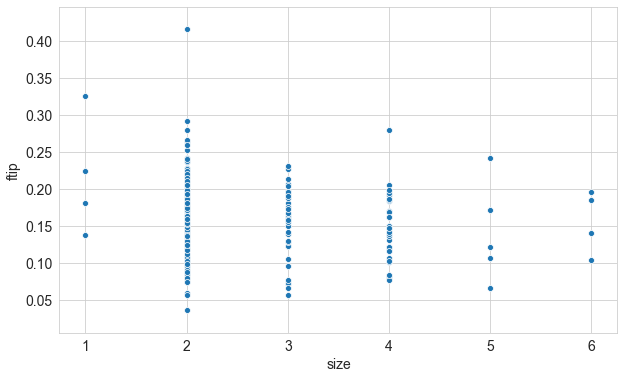

In [20]:
sns.scatterplot(x='size', y='ftip', data = df[df.ftip < 0.6]) # hue='smoker'

***
## 3. Regression

### 3.1 Linear regression using Seaborn

Now we will check to see if there is a relationship between the total bill and tip amount? We'll begin by using Seaborn to graphically look at all rows in the data set and check for a linear relationship on a plot of tip versus total_bill. Seaborn regplot draws a scatterplot of the two variables of interest, then fits a straight line to the data and plots the resulting regression line and a 95% confidence interval for that regression. It is a visual tool only, it does not return any parameters such as the slope and intercept of the fit, or the $R^2$ value.

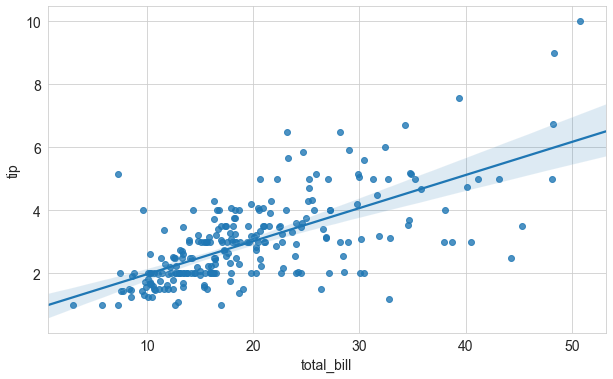

In [21]:
# Examine all rows first.
sns.regplot(x="total_bill", y="tip", data=df)

The shaded region in Seaborn regplot represents a 95% confidence interval for the regression. I would say this isn't a great fit, although there appears to be a linear relationship there. I wonder if subsets of the data might give *prettier* looking fits? For example, we can differentiate between smokers and non-smokers in the regplot.

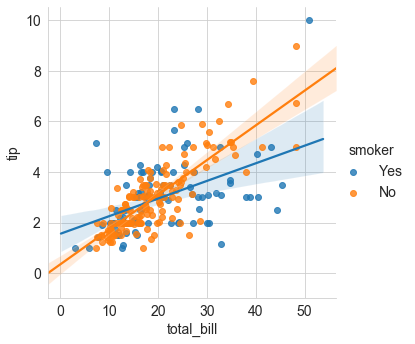

In [22]:
# Now differentiate between smokers and non-smokers.
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

The slopes of these lines are clearly different (although we can't access their values). Confidence intervals don't even overlap here. I wonder if the $R^2$ values are very different, signifying a better linear fit for smokers/non-smokers? One to explore later?

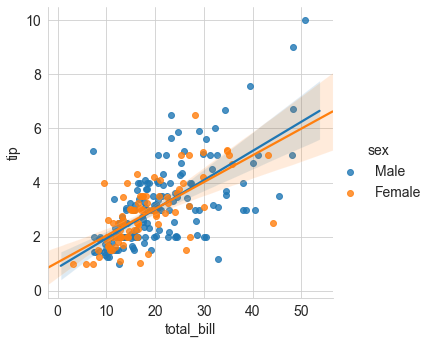

In [23]:
# Now differentiate between Male and Female.
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

Very good overlap between confidence intervals and the best fit lines here, so probably not worth considering gender alone as an interesting factor? We could continue to look at various factors below. It's difficult to tell what's going on when we set hue = day or size, but hue = time produces a similar plot to hue = sex.

In [24]:
# Try other hues. Comment out as clutter.
# sns.lmplot(x="total_bill", y="tip", hue="time", data=tips)

### 3.2 Simple linear regression
After listening to the week 9 lectures for this module on simple linear regression, I now include, for the sake of completeness, a simple linear regression model. It was actually completed after the work in 3.3 and 3.4 below. 

Polyfit: m = 0.105025, c = 0.920270.


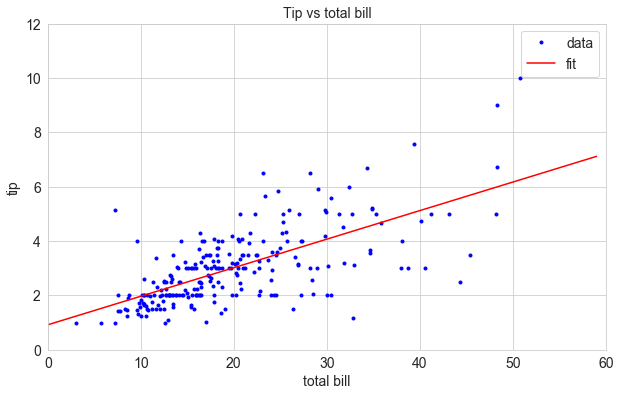

In [25]:
# Use numpy.polyfit(x, y, deg of the fit (1 is linear))
# x is the tip column of the data set.
# y is the total_bill column of the data set.

# Do simple linear regression
slr = np.polyfit(df['total_bill'], df['tip'], 1)
fit_m, fit_c = slr[0], slr[1]
print("Polyfit: m = %8.6f, c = %6.6f." % (fit_m, fit_c))

# Plot data and fitted line.
plt.plot(df['total_bill'], df['tip'], '.b', label='data')

# Plot fitted line.
x = np.arange(0.0, 60.0, 1.0)
plt.plot(x, fit_m * x + fit_c, 'r-', label="fit")

plt.title('Tip vs total bill', fontsize='14')
plt.xlabel('total bill', fontsize='14')
plt.ylabel('tip', fontsize='14')
plt.xlim(0, 60)
plt.ylim(0, 12)
plt.legend()

# Save the plot if required.
# plt.savefig("images/LSQalldata.png")

In [26]:
# How to check the fit quality?

### 3.3 Regression using Statsmodels

We want to investigate if the tip amount is proportional to the total bill. We will try some ordinary least squares (OLS) fitting using the statsmodels package. The regression model we will use is OLS(y,X) and we will add a y intercept to the X data. We want to check if **tip = m total_bill + c**, where m is the slope, c is the y intercept. We do not consider any of the categorical variables at this stage.

In [27]:
# x values = total_bill and we allow for a y intecept.
c_sm = sm.add_constant(df['total_bill'].values) # used .values to get rid of a warning.
# OLS model y values = tip, x values as above.
model_sm = sm.OLS(df['tip'], c_sm)
# preform the fit
fit_sm = model_sm.fit()

print(fit_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        18:32:49   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

This summary produces a lot of information, most of which we are not interested in. Notice that the $R^2$ value is not great as a value of 1 would imply a perfect fit. We are really only interested in:

In [28]:
print("Parameters:")
print(fit_sm.params)
print("R squared: ", fit_sm.rsquared)

Parameters:
const    0.920270
x1       0.105025
dtype: float64
R squared:  0.45661658635167646


### 3.4 Regression using scikit-learn

Repeat the fitting process using scikit-learn. LinearRegression() fits a linear model to the data.

In [29]:
# OLS model.
model = lm.LinearRegression()
# set up X values.
X = df[['total_bill']]
# set up y values.
y = df['tip']
# perform the regression.
model.fit(X, y)

print('Line slope: \n', model.coef_)
print('y intercept: \n', model.intercept_)
print('R-squared: \n', model.score(X,y))

# What tip do we predict for total_bill=$100?
spend = 100
pred = model.coef_ * spend + model.intercept_
print("We expect a tip of $", round(pred[0],2), " for a spend of $", spend )

Line slope: 
 [0.10502452]
y intercept: 
 0.9202696135546731
R-squared: 
 0.45661658635167657
We expect a tip of $ 11.42  for a spend of $ 100


So, both Statsmodels and scikit-learn give the same fitting parameters; slope = 0.105, y intercept = 0.92, and $R^2$ = 0.46. The tip is indeed linearly proportional to the total bill but the $R^2$ value is not great. We might get a better fit if we consider subsets of the data? Have also found fit where all columns used as X? For now, we can say that, based on our regression above, we would expect a $\$11.42$ tip if the total bill was $\$100$. See the README for more detail on $R^2$ and our prediction.

### Consider linear regression on only a single party size
We can try doing regression where we consider only party sizes of 2 as they cover 156 of the 244 observations.

In [30]:
# Checking subsets of df
# y1 = df.loc[(df['tip'] > 0) & (df['size'] == 2)] # ok but long-winded
# y2 = y1['tip'] # just one col ok
# y3 = df.loc[df['size'] == 2] #ok
# y4 = y3['tip']

# Select only those rows with party size = 2
s2 = df.loc[df['size'] == 2] # all columns, certain rows
X = s2[['total_bill']] 
# print(X)
y = df.loc[df['size'] == 2]['tip'] # all in one ok
model.fit(X, y) # do fit

print('Line slope size=2: \n', model.coef_)
print('y intercept size=2: \n', model.intercept_)
print('R-squared size=2: \n', model.score(X,y))

Line slope size=2: 
 [0.07845734]
y intercept size=2: 
 1.2918403397466431
R-squared size=2: 
 0.23150628080392022


The $R^2$ is even worse now. Plot the data and see that there's huge spread in the points, so it's not surprising that the fit to a line isn't great. I had been thinking that I could use the size=2 subset of data for predictions instead of the full data set, but clearly not.

Text(0, 0.5, 'tip')

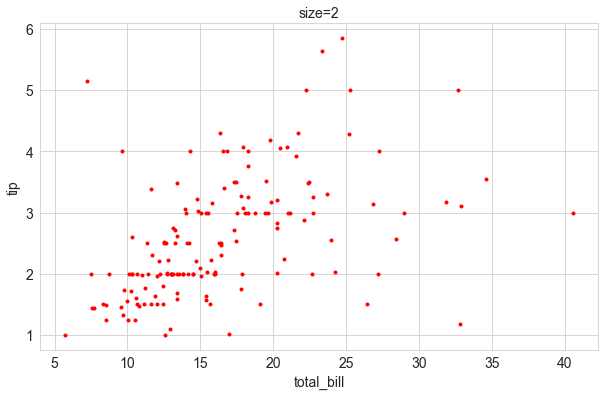

In [31]:
# PLot tip vs total bill for this party size
plt.plot(df.loc[df['size'] == 2]['total_bill'], df.loc[df['size'] == 2]['tip'], '.r')
plt.title('size=2', fontsize='14')
plt.xlabel('total_bill', fontsize='14')
plt.ylabel('tip', fontsize='14')

### How about regression for party sizes of 2, 3, 4 combined?

In [32]:
s3 = df.loc[df['size'].isin([2, 3, 4])] # all columns, certain rows
X = s3[['total_bill']] 
# print(X)
y = df.loc[df['size'].isin([2, 3, 4])]['tip'] # all in one ok
model.fit(X, y) # do fit

print('Line slope size=2,3,4: \n', model.coef_)
print('y intercept size=2,3,4: \n', model.intercept_)
print('R-squared size=2,3,4: \n', model.score(X,y))

Line slope size=2,3,4: 
 [0.10472345]
y intercept size=2,3,4: 
 0.9202481221900891
R-squared size=2,3,4: 
 0.4377621135583911


It's not a surprise to see that the fit on including party sizes of 2, 3, and 4 is almost identical to that for the full data set. These party sizes combined cover all but 13 rows of the data frame. We don't gain any extra information by doing this.

### Regression with various combinations of categorical variables.

In [33]:
# Select sex and smoker combinations to compare linear regression results.
fs = df.loc[(df['sex'] == 'Male') & (df['smoker'] == 'No')]
print(fs.shape) # check numbers correspond to pivot table data below.
X = fs[['total_bill']]
y = fs['tip']

model.fit(X, y) # do fit

print('Line slope : \n', model.coef_)
print('y intercept : \n', model.intercept_)
print('R-squared : \n', model.score(X,y))

# What tip do we predict for total_bill=$100?
spend = 100
pred = model.coef_ * spend + model.intercept_
print("We expect a tip of $", round(pred[0],2), " for a spend of $", spend )

(97, 8)
Line slope : 
 [0.13971878]
y intercept : 
 0.3481945382935785
R-squared : 
 0.6700097355989045
We expect a tip of $ 14.32  for a spend of $ 100


In [34]:
# Select certain days.
print("Days are: ", df.day.unique())

d = df.loc[df['day'] == 'Sun'] # all columns, certain rows
X = d[['total_bill']] 
# print(X)
y = df.loc[df['day'] == 'Sun']['tip'] # all in one ok
model.fit(X, y) # do fit

print('Line slope day: \n', model.coef_)
print('y intercept day: \n', model.intercept_)
print('R-squared day: \n', model.score(X,y))

# What tip do we predict for total_bill=$100?
spend = 100
pred = model.coef_ * spend + model.intercept_
print("We expect a tip of $", round(pred[0],2), " for a spend of $", spend )

Days are:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
Line slope day: 
 [0.07015353]
y intercept day: 
 1.7531444940283958
R-squared day: 
 0.25175578021289746
We expect a tip of $ 8.77  for a spend of $ 100


I realize that this part of the notebook has become huge, but I don't want to just delete it because this is an assignment.  Rather than including lots of results here, I'll summarize the findings of this section (regression using only certain subsets of the data) in the README. Looks like the highest $R^2$ occurs for M or F non-smokers. The slope of the regression line for non-smokers, regardless of sex, is larger than for smokers. So what? I could keep going looking at various combinations of day and time, but I think I'll leave it for now. I will just note that good fitting parameters are also obtained for day = Thursday.

Lin reg using all cat vars? Here or next? Other work?

***
## 4. Relationships between variables

In the section on regression above, we investigated if the tip amount is related to the total bill. We found that it was. We can also ask other questions of the data. Do smokers tip more than non-smokers? Do men tip less than women? Are diners more likely to leave a large tip if they eat in the evening as part of a large group, rather than at lunch with a single friend? Does the day of the week matter at all? We will address some questions like these in this section.

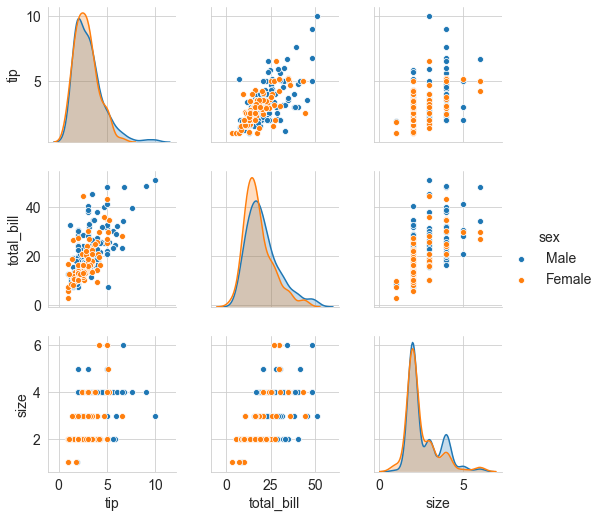

In [35]:
sns.pairplot(df, vars=["tip", "total_bill", "size"], hue='sex')

Don't know if Seaborn pairplot is much use to us here as most variables in the data set are categorical. Maybe explore relationship, if any, between tip and gender, party size etc. 

### Summarize data according to categorical variables
Wes McKinney's video "10 minutes to Pandas" talks about the pivot_table as a method to aggregate the numerical data by categorical variable. The default function is mean. We can use this to differentiate between the sexes, and further between smokers and non-smokers for example.

In [36]:
# Summarize data using sex and smoker keys.
df.pivot_table(index=['sex', 'smoker'])

ftip      size       tip  total_bill
sex    smoker                                          
Male   Yes     0.152771  2.500000  3.051167   22.284500
       No      0.160669  2.711340  3.113402   19.791237
Female Yes     0.182150  2.242424  2.931515   17.977879
       No      0.156921  2.592593  2.773519   18.105185

In [37]:
# Summarize data using sex and smoker keys.
# This time ignore outlier - doesn't make much difference.
# df[df.ftip < 0.6].pivot_table(index=['sex', 'smoker']) # ignore outlier

In [38]:
# Summarize fractional tip column only using sex and smoker keys AND group by party size.
df.pivot_table(['ftip'], index=['sex', 'smoker'], columns='size')

# Recall outlier = male, smoker, Sunday, dinner, size=2.
# See a tiny change in that cell, not worth bothering with.
# df[df.ftip < 0.6].pivot_table(['ftip'], index=['sex', 'smoker'], columns='size') # columns='day' or'time' # ignore outlier

ftip                                                  
size                  1         2         3         4         5         6
sex    smoker                                                            
Male   Yes     0.223776  0.155596  0.149560  0.149321  0.086116       NaN
       No           NaN  0.167800  0.146851  0.150611  0.181526  0.149567
Female Yes     0.325733  0.184925  0.168718  0.109252       NaN       NaN
       No      0.159829  0.160152  0.154999  0.139444  0.172194  0.162891

In [39]:
# Summarize fractional tip column only using smoker and day keys.
df.pivot_table(['ftip'], index=['smoker'], columns='day') # To count group sizes: aggfunc='count'

ftip                              
day         Thur       Fri       Sat       Sun
smoker                                        
Yes     0.163863  0.174783  0.147906  0.187250
No      0.160298  0.151650  0.158048  0.160113

In [40]:
# How many in each group?.
df.pivot_table(['ftip'], index=['smoker'], columns='day', aggfunc='count') # To count group sizes: aggfunc='count'

ftip            
day    Thur Fri Sat Sun
smoker                 
Yes      17  15  42  19
No       45   4  45  57

Why do this? Regression results above had largest $R^2$ and slope for non-smokers, regardless of sex. Same for day=Thur. Does this suggest a good subset of the data to use for reliable prediction?